# E-commerce Customer Segmentation

### Importing libraries

In [2]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Loading the dataset

In [3]:
cust_data = pd.read_excel(r'D:\Learning\Imarticus-Practise-Sets\K-meansproject\K-means project\Dataset\cust_data.xlsx')
cust_data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


### Data Preprocessing

In [4]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
cust_data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [6]:
cust_data = cust_data.dropna(subset=['Gender']) # removing null values

In [7]:
cust_data.Gender.isnull().sum()

0

In [8]:
cust_data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,...,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000
mean,15026.349795,4.244647,0.276873,0.262795,0.227489,0.168463,0.147492,0.142140,0.108740,0.114276,...,0.102691,0.272877,0.376778,0.160141,0.077797,0.057303,0.193760,0.120656,0.090592,0.071271
std,8655.855928,3.580825,0.817612,0.719259,0.925124,0.757750,0.656230,0.530013,0.519941,0.553790,...,0.492114,0.716391,0.760309,0.507343,0.384146,0.299185,0.628296,0.457624,0.405152,0.387592
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7557.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15065.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22537.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [9]:
cust_data.columns[cust_data.dtypes=='object']

Index(['Gender'], dtype='object')

In [10]:
cust_data.Gender = cust_data.Gender.replace({'F':1, 'M':0})

# Modeling 

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)  # 3 clusters are created

In [12]:
kmeans.fit(cust_data)

KMeans(n_clusters=3)

In [13]:
len(list(kmeans.labels_))

27276

In [14]:
kmeans.score(cust_data)

-227305320223.484

## Finding Optimal Vlaue Of K

In [15]:
# Elbow Plot
ssd = []
no_cluster = []
for i in range(1,11):
    no_cluster.append(i)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cust_data)
    score = kmeans.score(cust_data)
    score = np.round(np.abs(score))
    ssd.append(score)

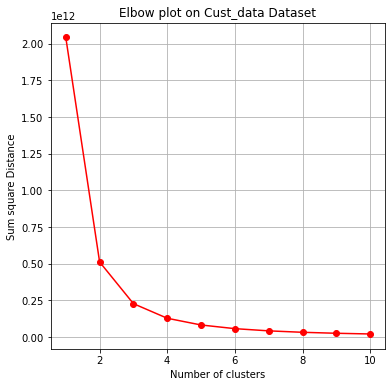

In [16]:
plt.figure(figsize=(6,6))
plt.plot(no_cluster,ssd, marker = 'o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Sum square Distance')
plt.title('Elbow plot on Cust_data Dataset')
plt.grid();

In [17]:
ssd.sort()

In [18]:
for i in range(len(ssd)):
    if i!=len(ssd)-1:
        print(i)
        print((ssd[i]-ssd[i+1])*100/ssd[i])

0
-23.48336182324947
1
-26.247233029676103
2
-30.75974286400429
3
-36.09637826135848
4
-44.069655701218814
5
-56.09860034879954
6
-77.97602486022977
7
-125.14626152469813
8
-299.3120296510703


# Silhouette analysis

In [21]:
for num_clusters in range(2,11):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cust_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cust_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6262938916067652
For n_clusters=3, the silhouette score is 0.5900508450412043
For n_clusters=4, the silhouette score is 0.5722588283333572
For n_clusters=5, the silhouette score is 0.5608751289393996
For n_clusters=6, the silhouette score is 0.5536846759472739
For n_clusters=7, the silhouette score is 0.5482981425762813
For n_clusters=8, the silhouette score is 0.5449752436019795
For n_clusters=9, the silhouette score is 0.5412520147540767
For n_clusters=10, the silhouette score is 0.5387668118819013


In [22]:
kmeans = KMeans(n_clusters=4,
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)  # 4 clusters are created
kmeans.fit(cust_data)
score = kmeans.score(cust_data)

In [23]:
cust_data['Labels'] = list(kmeans.labels_)

In [29]:
cust_data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Labels
0,1,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,3,0,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5,6,1,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,2


In [25]:
centroids = list(kmeans.cluster_centers_)
centroids

[array([1.11952044e+04, 8.01650457e-01, 4.24432655e+00, 2.44031830e-01,
        2.50515768e-01, 2.13527851e-01, 1.48835838e-01, 1.28941939e-01,
        1.43530799e-01, 1.07721780e-01, 9.71117006e-02, 1.13910993e-01,
        1.39994106e-01, 3.43353964e-01, 2.08812261e-01, 1.36310050e-01,
        2.08222812e-01, 1.11258473e-01, 3.13586796e-01, 4.52402004e-02,
        7.79840849e-01, 2.31948128e-01, 4.92042440e-01, 2.48894783e-01,
        1.04921898e-01, 5.30503979e-02, 4.05098733e-01, 1.33952255e-01,
        9.31329207e-02, 2.43295019e-01, 3.51311524e-01, 1.48099027e-01,
        6.24815797e-02, 4.49454760e-02, 1.93928677e-01, 1.22752726e-01,
        9.60801650e-02, 6.35131152e-02]),
 array([2.62147285e+04, 8.31980284e-01, 4.33473471e+00, 3.61264135e-01,
        2.73847492e-01, 3.06320673e-01, 2.03537257e-01, 2.02087562e-01,
        1.62945781e-01, 1.32792114e-01, 1.31197449e-01, 8.39373732e-02,
        1.74108437e-01, 3.50536387e-01, 1.91794723e-01, 1.74978255e-01,
        1.79327341e-01

In [26]:
cent = pd.DataFrame(centroids)
cent

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,11195.204391,0.801650,4.244327,0.244032,0.250516,0.213528,0.148836,0.128942,0.143531,0.107722,...,0.093133,0.243295,0.351312,0.148099,0.062482,0.044945,0.193929,0.122753,0.096080,0.063513
1,26214.728472,0.831980,4.334735,0.361264,0.273847,0.306321,0.203537,0.202088,0.162946,0.132792,...,0.123224,0.338794,0.420847,0.175993,0.128443,0.077559,0.190055,0.119455,0.074079,0.061757
2,3722.399347,0.774217,4.126687,0.208129,0.233497,0.154280,0.118973,0.095831,0.113485,0.076101,...,0.075953,0.218069,0.325323,0.156060,0.045987,0.042872,0.192998,0.125056,0.101469,0.059783
3,18678.465771,0.825573,4.270325,0.292074,0.292658,0.233980,0.201284,0.161728,0.148008,0.117647,...,0.117793,0.289739,0.408262,0.160123,0.073274,0.063348,0.198073,0.115458,0.091082,0.099839


In [28]:
cent.columns = cust_data.columns[0:len(cust_data.columns)-1]
cent    

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,11195.204391,0.801650,4.244327,0.244032,0.250516,0.213528,0.148836,0.128942,0.143531,0.107722,...,0.093133,0.243295,0.351312,0.148099,0.062482,0.044945,0.193929,0.122753,0.096080,0.063513
1,26214.728472,0.831980,4.334735,0.361264,0.273847,0.306321,0.203537,0.202088,0.162946,0.132792,...,0.123224,0.338794,0.420847,0.175993,0.128443,0.077559,0.190055,0.119455,0.074079,0.061757
2,3722.399347,0.774217,4.126687,0.208129,0.233497,0.154280,0.118973,0.095831,0.113485,0.076101,...,0.075953,0.218069,0.325323,0.156060,0.045987,0.042872,0.192998,0.125056,0.101469,0.059783
3,18678.465771,0.825573,4.270325,0.292074,0.292658,0.233980,0.201284,0.161728,0.148008,0.117647,...,0.117793,0.289739,0.408262,0.160123,0.073274,0.063348,0.198073,0.115458,0.091082,0.099839


# -------------------------------------------END--------------------------------------------------